***Vorlesung 'Syntax natürlicher Sprachen', WS 2019/20***

--- 
# Merkmasstrukturbasierte NP-Grammatik (*feature-based* CFG)

In [49]:
import nltk

def test_fcfg_grammar(gramstring, sent, draw=0, tracing=0):
    grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
    parser = nltk.parse.FeatureChartParser(grammar,trace=tracing)
    analyzed = False
    for tree in parser.parse(sent):
        print(tree)
        if draw: display(tree)
        analyzed = True
    if not analyzed:
        print("Keine Analyse möglich")    

def test_cfg_grammar(grammar, sent, tracing=0):
    parser = nltk.ChartParser(grammar,trace=tracing)
    analyzed = False
    for tree in parser.parse(sent):
        tree.pretty_print(unicodelines=True)
        analyzed = True
    if not analyzed:
        print("Keine Analyse möglich")            
        

---
## 1. *feature-based*-Grammatik für nominales Agreement:

In [50]:
gramstring = r"""
% start NP

NP[CASE=?c, AGR=?a] -> Det[CASE=?c, AGR=?a] N[CASE=?c, AGR=?a]


# masc
Det[CASE=nom, AGR=[GND=masc,PER=3,NUM=sg]] -> 'der' 
Det[CASE=acc, AGR=[GND=masc,PER=3,NUM=sg]] -> 'den'

# fem
Det[CASE=nom, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 
Det[CASE=acc, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 


# Nouns
N[AGR=[GND=masc,PER=3,NUM=sg]] -> 'Hund'
N[AGR=[GND=fem,PER=3,NUM=sg]] -> 'Katze'
"""

### NP-Formen (positiv):

In [51]:
sent = 'der Hund'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom']
  (Det[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom'] der)
  (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))


In [52]:
sent = 'den Hund'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='acc']
  (Det[AGR=[GND='masc', NUM='sg', PER=3], CASE='acc'] den)
  (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))


In [53]:
sent = 'die Katze'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='fem', NUM='sg', PER=3], CASE='acc']
  (Det[AGR=[GND='fem', NUM='sg', PER=3], CASE='acc'] die)
  (N[AGR=[GND='fem', NUM='sg', PER=3]] Katze))
(NP[AGR=[GND='fem', NUM='sg', PER=3], CASE='nom']
  (Det[AGR=[GND='fem', NUM='sg', PER=3], CASE='nom'] die)
  (N[AGR=[GND='fem', NUM='sg', PER=3]] Katze))


### NP-Formen (negativ):

In [54]:
sent = 'die Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [55]:
sent = 'der Katze'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [56]:
sent = 'den Katze'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


---
## 2. *feature-based*-Grammatik für Adjektivdeklination:

In [57]:
## mit LÖSUNG für fehlende Differenzierung schwach/stark bei masc, nom:
    ## Einführung DECL-Merkmal (Werte: strong, weak)

gramstring = r"""
% start NP

NP[CASE=?c, AGR=?a] -> Adj[CASE=?c, AGR=?a, DECL=strong] N[CASE=?c, AGR=?a]

NP[CASE=?c, AGR=?a] -> Det[CASE=?c, AGR=?a] Adj[CASE=?c, AGR=?a, DECL=weak] N[CASE=?c, AGR=?a]


# masc
Det[CASE=nom, AGR=[GND=masc,PER=3,NUM=sg]] -> 'der' 
Det[CASE=acc, AGR=[GND=masc,PER=3,NUM=sg]] -> 'den'

# fem
Det[CASE=nom, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 
Det[CASE=acc, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 
    # fem alternativ (mit unterspezifiziertem Kasusmerkmal)
#Det[AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 


# Nouns
N[AGR=[GND=masc,PER=3,NUM=sg]] -> 'Hund'
N[AGR=[GND=fem,PER=3,NUM=sg]] -> 'Katze'


# Adjectives
    #masc-stark:
Adj[CASE=nom, AGR=[NUM=sg,GND=masc], DECL=strong] -> 'schöner'
    #masc-schwach:
Adj[CASE=nom, AGR=[NUM=sg,GND=masc], DECL=weak] -> 'schöne'
    #masc-schwach/stark:
Adj[CASE=acc, AGR=[NUM=sg,GND=masc]] -> 'schönen'

    # fem (Kasus-unterspezifiziert):
Adj[AGR=[NUM=sg,GND=fem]] -> 'schöne' 
"""

### starke Formen (positiv):

In [58]:
sent = 'schöner Hund'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom']
  (Adj[AGR=[GND='masc', NUM='sg'], CASE='nom', DECL='strong']
    schöner)
  (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))


In [59]:
sent = 'schönen Hund'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='acc']
  (Adj[AGR=[GND='masc', NUM='sg'], CASE='acc'] schönen)
  (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))


In [60]:
sent = 'schöne Katze'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='fem', NUM='sg', PER=3], CASE=?c]
  (Adj[AGR=[GND='fem', NUM='sg']] schöne)
  (N[AGR=[GND='fem', NUM='sg', PER=3]] Katze))


### starke Formen (negativ):

In [61]:
sent = 'schöner Katze'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [62]:
sent = 'schönen Katze'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [63]:
## korrektes Ergebnis durch Einführung DECL-Merkmal
sent = 'schöne Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


### schwache Formen (positiv):

In [64]:
sent = 'der schöne Hund'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom']
  (Det[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom'] der)
  (Adj[AGR=[GND='masc', NUM='sg'], CASE='nom', DECL='weak'] schöne)
  (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))


In [65]:
sent = 'den schönen Hund'.split()
test_fcfg_grammar(gramstring, sent)

(NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='acc']
  (Det[AGR=[GND='masc', NUM='sg', PER=3], CASE='acc'] den)
  (Adj[AGR=[GND='masc', NUM='sg'], CASE='acc'] schönen)
  (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))


(NP[AGR=[GND='fem', NUM='sg', PER=3], CASE='acc']
  (Det[AGR=[GND='fem', NUM='sg', PER=3], CASE='acc'] die)
  (Adj[AGR=[GND='fem', NUM='sg']] schöne)
  (N[AGR=[GND='fem', NUM='sg', PER=3]] Katze))


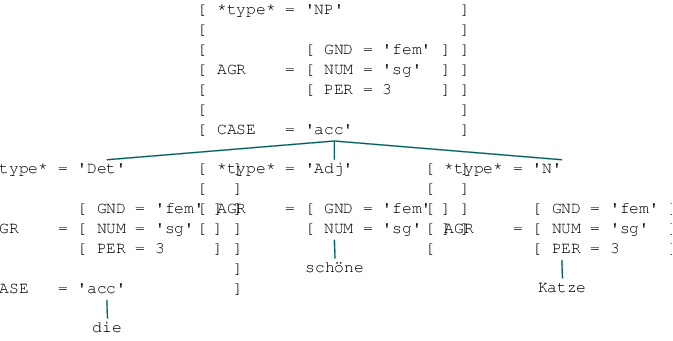

(NP[AGR=[GND='fem', NUM='sg', PER=3], CASE='nom']
  (Det[AGR=[GND='fem', NUM='sg', PER=3], CASE='nom'] die)
  (Adj[AGR=[GND='fem', NUM='sg']] schöne)
  (N[AGR=[GND='fem', NUM='sg', PER=3]] Katze))


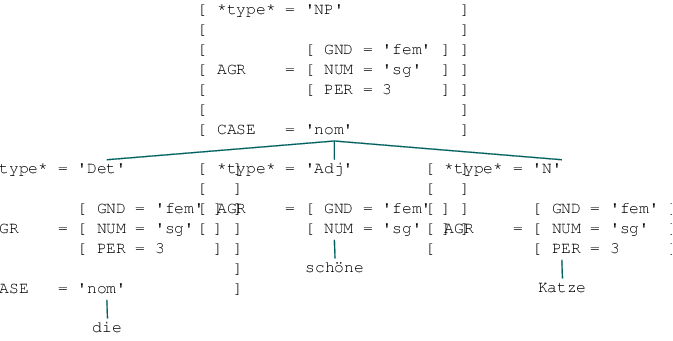

In [66]:
sent = 'die schöne Katze'.split()
test_fcfg_grammar(gramstring, sent, draw=1)

### schwache Formen (negativ):

In [67]:
sent = 'der schönen Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [68]:
sent = 'den schöner Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [69]:
sent = 'den schöne Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [70]:
sent = 'die schöne Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [71]:
sent = 'der schönen Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich


In [72]:
## korrektes Ergebnis durch Einführung DECL-Merkmal
sent = 'der schöner Hund'.split()
test_fcfg_grammar(gramstring, sent)

Keine Analyse möglich
